*Supervised Learning* is a type of machine learning where an algorithm learns from labeled training data to make predictions or decisions. It involves providing the algorithm with input-output pairs, allowing it to map inputs to corresponding outputs.

Supervised learning is widely used in various applications, including natural language processing, computer vision, recommendation systems, and many more, to make predictions and decisions based on available data.

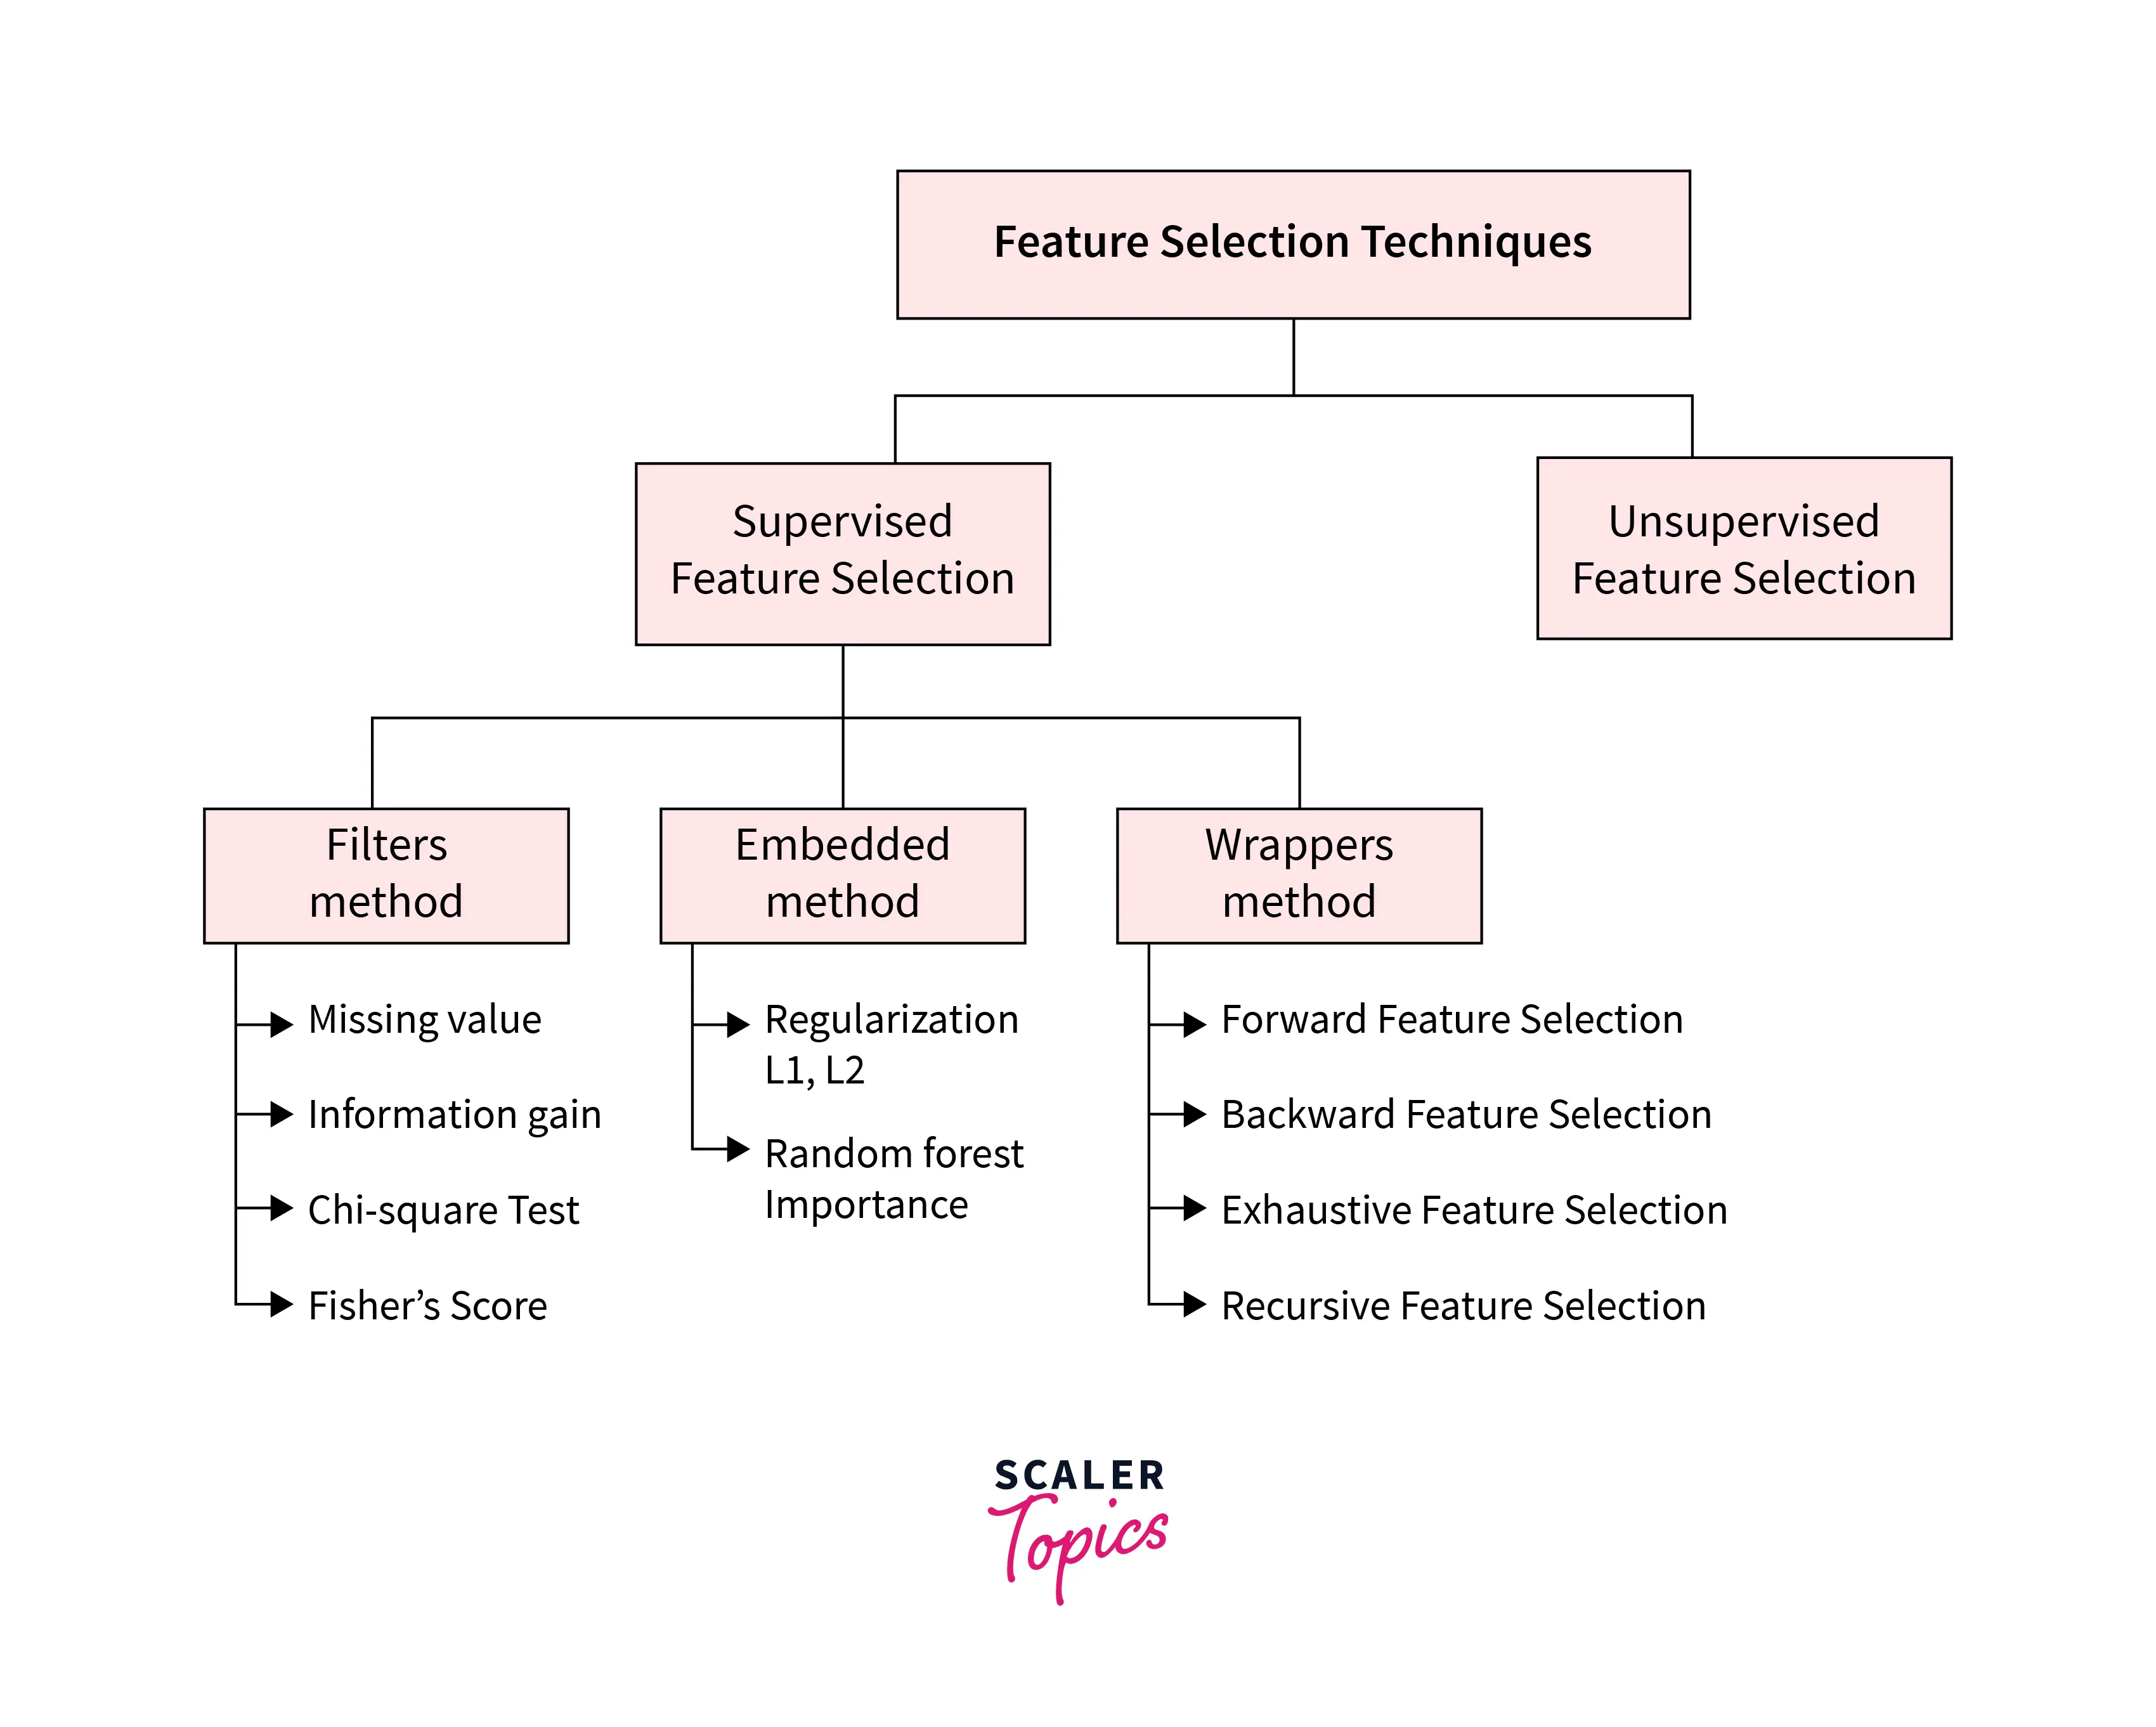

In [ ]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.feature_selection import VarianceThreshold
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import chi2
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn import feature_selection
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeClassifierCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/AI_Project/heart.csv')

In [ ]:
dataset.head()

,ID,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,1,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,2,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,3,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,4,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,5,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
X = dataset.drop('HeartDisease', axis = 1)
y = dataset['HeartDisease']
X.shape, y.shape

((918, 12), (918,))

In [ ]:
label_encoder = preprocessing.LabelEncoder()
dataset['Sex']= label_encoder.fit_transform(dataset['Sex'])
dataset['ChestPainType']= label_encoder.fit_transform(dataset['ChestPainType'])
dataset['RestingECG']= label_encoder.fit_transform(dataset['RestingECG'])
dataset['ExerciseAngina']= label_encoder.fit_transform(dataset['ExerciseAngina'])
dataset['ST_Slope']= label_encoder.fit_transform(dataset['ST_Slope'])

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              918 non-null    int64  
 1   Age             918 non-null    int64  
 2   Sex             918 non-null    int64  
 3   ChestPainType   918 non-null    int64  
 4   RestingBP       918 non-null    int64  
 5   Cholesterol     918 non-null    int64  
 6   FastingBS       918 non-null    int64  
 7   RestingECG      918 non-null    int64  
 8   MaxHR           918 non-null    int64  
 9   ExerciseAngina  918 non-null    int64  
 10  Oldpeak         918 non-null    float64
 11  ST_Slope        918 non-null    int64  
 12  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 93.4 KB


In [ ]:
dataset.describe()

,ID,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,459.500000,53.510893,0.789760,0.781046,132.396514,198.799564,0.233115,0.989107,136.809368,0.404139,0.887364,1.361656,0.553377
std,265.148072,9.432617,0.407701,0.956519,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,1.066570,0.607056,0.497414
min,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,230.250000,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,459.500000,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,688.750000,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,918.000000,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


In [ ]:
dataset.corr()

,ID,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
ID,1.000000,0.289604,-0.032528,0.067823,0.022075,0.111230,0.033716,-0.382101,0.165221,0.033611,0.188523,-0.116606,0.055109
Age,0.289604,1.000000,0.055750,-0.077150,0.254399,-0.095282,0.198039,-0.007484,-0.382045,0.215793,0.258612,-0.268264,0.282039
Sex,-0.032528,0.055750,1.000000,-0.126559,0.005133,-0.200092,0.120076,0.071552,-0.189186,0.190664,0.105734,-0.150693,0.305445
ChestPainType,0.067823,-0.077150,-0.126559,1.000000,-0.020647,0.067880,-0.073151,-0.072537,0.289123,-0.354727,-0.177377,0.213521,-0.386828
RestingBP,0.022075,0.254399,0.005133,-0.020647,1.000000,0.100893,0.070193,0.022656,-0.112135,0.155101,0.164803,-0.075162,0.107589
Cholesterol,0.111230,-0.095282,-0.200092,0.067880,0.100893,1.000000,-0.260974,-0.196544,0.235792,-0.034166,0.050148,0.111471,-0.232741
FastingBS,0.033716,0.198039,0.120076,-0.073151,0.070193,-0.260974,1.000000,0.087050,-0.131438,0.060451,0.052698,-0.175774,0.267291
RestingECG,-0.382101,-0.007484,0.071552,-0.072537,0.022656,-0.196544,0.087050,1.000000,-0.179276,0.077500,-0.020438,-0.006778,0.057384
MaxHR,0.165221,-0.382045,-0.189186,0.289123,-0.112135,0.235792,-0.131438,-0.179276,1.000000,-0.370425,-0.160691,0.343419,-0.400421
ExerciseAngina,0.033611,0.215793,0.190664,-0.354727,0.155101,-0.034166,0.060451,0.077500,-0.370425,1.000000,0.408752,-0.428706,0.494282


# ***Correlated Feature Removal***



*   Feature Space to target correlation is desired

*  Feature to feature correlation is not desired


*   If 2 features are highly correlated then either feature is redundant
*  Correlation in feature space increases model complexity


*   Removing correlated features improves model performance
*  Different model shows different performance over the correlated features







<Axes: >

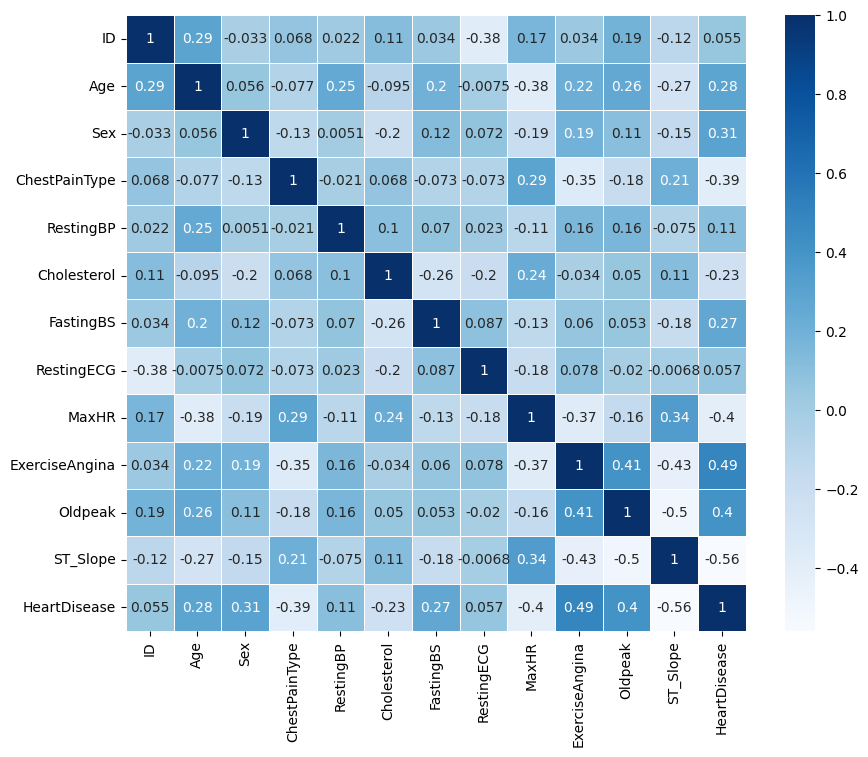

In [ ]:
corrmat=dataset.corr()
f,ax=plt.subplots(figsize=(10,8))
sns.heatmap(corrmat,ax=ax,cmap="Blues",linewidth=0.5,annot=True)

In [ ]:
#split target and attribute
x = dataset.iloc[:,0:12]
y = dataset.iloc[:,12]

#split train n test dataset
X_train, X_test, y_train, y_test = train_test_split(x,y, random_state=0, test_size=0.2)
print(len(y_test))
print(len(X_train))
print(len(dataset))

print(x)
print(y)

184
734
918
      ID  Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
0      1   40    1              1        140          289          0   
1      2   49    0              2        160          180          0   
2      3   37    1              1        130          283          0   
3      4   48    0              0        138          214          0   
4      5   54    1              2        150          195          0   
..   ...  ...  ...            ...        ...          ...        ...   
913  914   45    1              3        110          264          0   
914  915   68    1              0        144          193          1   
915  916   57    1              0        130          131          0   
916  917   57    0              1        130          236          0   
917  918   38    1              2        138          175          0   

     RestingECG  MaxHR  ExerciseAngina  Oldpeak  ST_Slope  
0             1    172               0      0.0         2  
1  

# ***PEARSON CORRELATION***

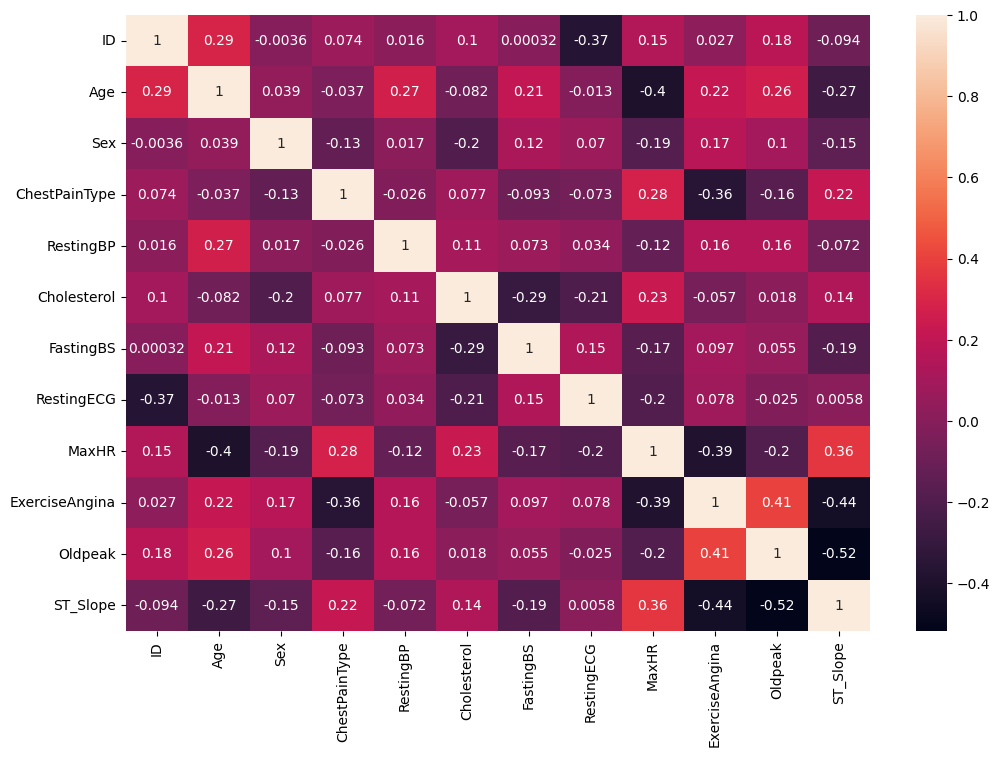

In [ ]:
X_train_unique = pd.DataFrame(X_train)
X_test_unique = pd.DataFrame(X_test)  # Assuming 'data' contains your data

corrmat = X_train_unique.corr()

# Create a figure with the desired aspect ratio
plt.figure(figsize=(12, 8))  # You can adjust the width and height as needed

# Plot the heatmap
sns.heatmap(corrmat, annot=True)  # You can add 'annot=True' to display values in the cells

# Show the plot
plt.show()


In [ ]:
def get_correlation(data, threshold):
    corr_col = set()
    corrmat = data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i, j])> threshold:
                colname = corrmat.columns[i]
                corr_col.add(colname)
    return corr_col

In [ ]:
corr_features = get_correlation(X_train_unique, 0.85)
corr_features

set()

In [ ]:
len(corr_features)

0

In [ ]:
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy on test set: {:.3f}'.format(accuracy))

In [ ]:
X_train_uncorr = X_train_unique.drop(labels=corr_features, axis = 1)
X_test_uncorr = X_test_unique.drop(labels = corr_features, axis = 1)
X_train_uncorr.shape, X_test_uncorr.shape

((734, 12), (184, 12))

In [ ]:
%%time
run_randomForest(X_train_uncorr, X_test_uncorr, y_train, y_test)

Accuracy on test set: 0.859
CPU times: user 402 ms, sys: 8.44 ms, total: 411 ms
Wall time: 480 ms


In [ ]:
%%time
run_randomForest(X_train, X_test, y_train, y_test)

Accuracy on test set: 0.859
CPU times: user 398 ms, sys: 11.8 ms, total: 410 ms
Wall time: 449 ms


In [ ]:
(0.454-0.433)*100/0.454 #train gain time

4.625550660792955

In [ ]:
corrdata = corrmat.abs().stack()
corrdata

ID        ID                1.000000
          Age               0.289498
          Sex               0.003562
          ChestPainType     0.073719
          RestingBP         0.015823
                              ...   
ST_Slope  RestingECG        0.005824
          MaxHR             0.362246
          ExerciseAngina    0.435915
          Oldpeak           0.518003
          ST_Slope          1.000000
Length: 144, dtype: float64

In [ ]:
corrmat

,ID,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
ID,1.000000,0.289498,-0.003562,0.073719,0.015823,0.099736,0.000321,-0.368353,0.151225,0.027310,0.178493,-0.093624
Age,0.289498,1.000000,0.039411,-0.036625,0.268824,-0.081927,0.208463,-0.013175,-0.401140,0.220006,0.259824,-0.266942
Sex,-0.003562,0.039411,1.000000,-0.130453,0.017228,-0.197867,0.119555,0.070281,-0.185326,0.173488,0.103033,-0.146682
ChestPainType,0.073719,-0.036625,-0.130453,1.000000,-0.025595,0.076800,-0.092938,-0.072593,0.278769,-0.357255,-0.164224,0.222739
RestingBP,0.015823,0.268824,0.017228,-0.025595,1.000000,0.110008,0.072947,0.034286,-0.124557,0.158536,0.160853,-0.071887
Cholesterol,0.099736,-0.081927,-0.197867,0.076800,0.110008,1.000000,-0.290410,-0.207880,0.230608,-0.057398,0.018313,0.143861
FastingBS,0.000321,0.208463,0.119555,-0.092938,0.072947,-0.290410,1.000000,0.146099,-0.166842,0.096521,0.054856,-0.189076
RestingECG,-0.368353,-0.013175,0.070281,-0.072593,0.034286,-0.207880,0.146099,1.000000,-0.196105,0.077649,-0.025495,0.005824
MaxHR,0.151225,-0.401140,-0.185326,0.278769,-0.124557,0.230608,-0.166842,-0.196105,1.000000,-0.385863,-0.197471,0.362246
ExerciseAngina,0.027310,0.220006,0.173488,-0.357255,0.158536,-0.057398,0.096521,0.077649,-0.385863,1.000000,0.406388,-0.435915


In [ ]:
corrdata = pd.DataFrame(corrdata).reset_index()
corrdata.columns = ['features1', 'features2', 'corr_value']
corrdata

,features1,features2,corr_value
0,ID,ID,1.000000
1,ID,Age,0.289498
2,ID,Sex,0.003562
3,ID,ChestPainType,0.073719
4,ID,RestingBP,0.015823
...,...,...,...
139,ST_Slope,RestingECG,0.005824
140,ST_Slope,MaxHR,0.362246
141,ST_Slope,ExerciseAngina,0.435915
142,ST_Slope,Oldpeak,0.518003


# ***Remove constant and quasi constant features***

# ***Filtering method***

Features selected using filter methods can be used as an input to any machine learning models.


Univariate -> Fisher Score, Mutual Information Gain, Variance etc
Multi-variate -> Pearson Correlation



The univariate filter methods are the type of methods where individual features are ranked according to specific criteria. The top N features are then selected. Different types of ranking criteria are used for univariate filtermethods, for example fisher score, mutual information, and variance of the feature.

Multivariate filter methods are capable of removing redundant features from the data since they take the mutual relationship between the features into account.

Univariate Filtering Methods:
1.Constant Removal
2.Quasi Constant Removal
3.Duplicate Feature Removal

*Remove Constant Features*

In [ ]:
# Before Removing Constant Features
print("Shape before removing constant features:", X_train.shape, X_test.shape)

constant_filter = VarianceThreshold(threshold=0.01)  # Adjust the threshold as needed
constant_filter.fit(X_train)
X_train_filter = constant_filter.transform(X_train)
X_test_filter = constant_filter.transform(X_test)
print("Shape after removing constant features:", X_train_filter.shape, X_test_filter.shape)


Shape before removing constant features: (734, 12) (184, 12)
Shape after removing constant features: (734, 12) (184, 12)


* Remove Quasi-Constant Features*

Quasi-constant feature removal is a technique used in data preprocessing for machine learning. It involves identifying and removing features (columns) from a dataset that have very low variance or almost no variability.

In other words, quasi-constant features are those that have almost the same value for a large portion of the samples in the dataset. These features do not contribute much information to the model because they don't vary much and, as a result, may not be helpful in making predictions.

In [ ]:
# Before Removing Constant and Quasi-Constant Features
print("Shape before removing constant and quasi-constant features:", X_train.shape, X_test.shape)

quasi_constant_filter = VarianceThreshold(threshold=0.1)  # Adjust the threshold as needed
quasi_constant_filter.fit(X_train_filter)
X_train_quasi_filter = quasi_constant_filter.transform(X_train_filter)
X_test_quasi_filter = quasi_constant_filter.transform(X_test_filter)
print("Shape after removing quasi-constant features:", X_train_quasi_filter.shape, X_test_quasi_filter.shape)

Shape before removing constant and quasi-constant features: (734, 12) (184, 12)
Shape after removing quasi-constant features: (734, 12) (184, 12)


# ***Remove duplicate features***

In [ ]:
X_train_T = X_train_quasi_filter.T # transform kora
X_test_T = X_test_quasi_filter.T


In [ ]:
type(X_train_T)

numpy.ndarray

In [ ]:
X_train_T = pd.DataFrame(X_train_T) #nmpy to pdframe
X_test_T = pd.DataFrame(X_test_T)

In [ ]:
X_train_T.shape, X_test_T.shape

((12, 734), (12, 184))

In [ ]:
X_train_T.duplicated().sum()

0

In [ ]:
duplicated_features = X_train_T.duplicated()

In [ ]:
duplicated_features

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
dtype: bool

In [ ]:
features_to_keep = [not index for index in duplicated_features] #non duplicated


In [ ]:
X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T

In [ ]:
X_train_unique.shape, X_train.shape

((734, 12), (734, 12))

# ***Mutual Information Gain***

Mutual information gain is a measure used in feature selection to quantify the dependency between two random variables. In the context of machine learning and feature selection, it's used to determine the relevance of a feature with respect to the target variable.

Specifically, mutual information gain measures the reduction in uncertainty about the target variable, given the value of a feature. In other words, it quantifies how much knowing the value of a particular feature improves our ability to predict the target.

Here's how it works:

1.Entropy: Entropy is a measure of disorder or impurity in a set of data. In the context of a target variable, it quantifies the amount of unpredictability. If a set is completely homogeneous (e.g., all elements belong to the same class), the entropy is low. If it's evenly split between classes, the entropy is high.

2.Conditional Entropy: Given a feature, the conditional entropy of the target variable is a measure of the remaining uncertainty about the target variable. It quantifies the amount of disorder in the target variable after observing the feature.

3.Mutual Information: This is the reduction in uncertainty about the target variable after observing a feature.

In [ ]:
mi = mutual_info_classif(X_train_unique, y_train)


In [ ]:
len(mi)

12

In [ ]:
mi[: 10]

array([0.08816262, 0.02753822, 0.0461827 , 0.14901455, 0.03732418,
       0.06844648, 0.00924862, 0.01258139, 0.10275727, 0.15820295])

In [ ]:
mi = pd.Series(mi)
mi.index = X_train_unique.columns

In [ ]:
mi.sort_values(ascending=False, inplace = True)

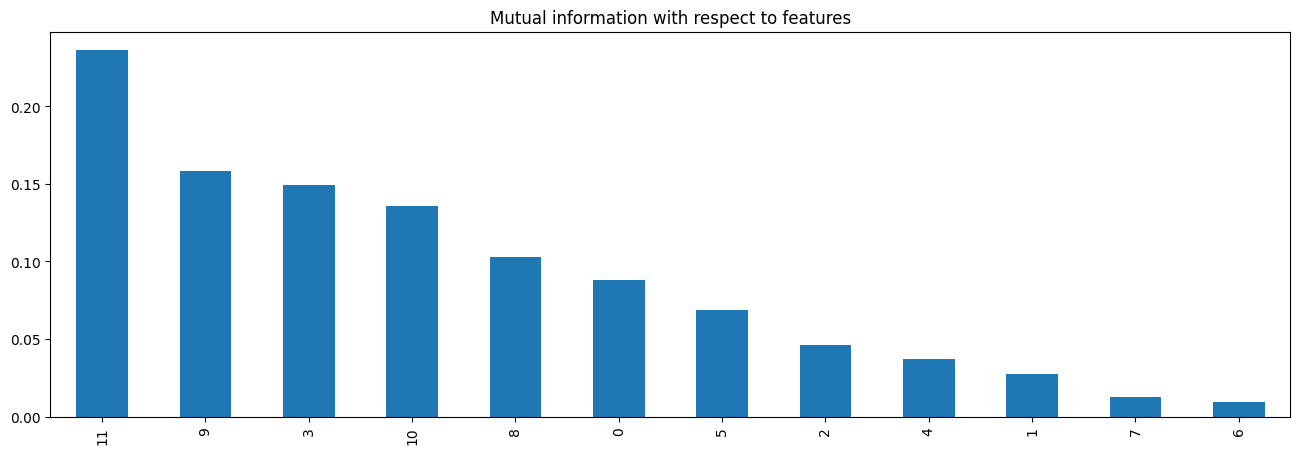

In [ ]:
plt.title('Mutual information with respect to features')
mi.plot.bar(figsize = (16,5))
plt.show()

In [ ]:
sel = SelectPercentile(mutual_info_classif, percentile=10).fit(X_train_unique, y_train)
X_train_unique.columns[sel.get_support()]

Int64Index([10, 11], dtype='int64')

In [ ]:
len(X_train_unique.columns[sel.get_support()])

2

In [ ]:
X_train_mi = sel.transform(X_train_unique)
X_test_mi = sel.transform(X_test_unique)


In [ ]:
X_train_mi.shape

(734, 2)

# ***BUILD MODEL & COMPARE PERFORMANCE***

In [ ]:
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1) #using rfc classifier
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy on test set: ', accuracy_score(y_test, y_pred))

In [ ]:
%%time
run_randomForest(X_train_unique, X_test_unique, y_train, y_test) #transformed dataset

Accuracy on test set:  0.8586956521739131
CPU times: user 427 ms, sys: 10.4 ms, total: 438 ms
Wall time: 855 ms


In [ ]:
%%time
run_randomForest(X_train, X_test, y_train, y_test) #original dataset

Accuracy on test set:  0.8586956521739131
CPU times: user 466 ms, sys: 14.1 ms, total: 480 ms
Wall time: 1.18 s


Before and After Data Processing:

Before Data Processing:

1.The original dataset had 12 features.

2.The data was standardized, which means it was scaled to have a mean of 0 and a standard deviation of 1.

3.Duplicated features were removed, resulting in fewer features with the same data.

4.No correlated features were found, so no correlated features were removed.

After Data Processing:

1.The dataset still contains 12 features.

2.The data is standardized, which can help machine learning models perform better.

3.Duplicated features were removed, which reduced the number of features with duplicated data.

4.No correlated features were found, so no correlated features were removed.

In summary, the data processing steps helped standardize the data and remove duplicated features, but no correlated features were detected in this specific dataset. The dataset size and the number of features remained the same after processing.

In [ ]:
#from sklearn.datasets import load_boston
##from sklearn.linear_model import LinearRegression
##from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
##boston = load_boston()
##print(boston.DESCR)

In [ ]:
##X = pd.DataFrame(data = boston.data, columns=boston.feature_names)
##X.head()


In [ ]:
##y = boston.target

In [ ]:
##X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In regression, mutual information gain is often used to assess the importance of different features in predicting the target variable. It helps in identifying which features contain valuable information for making accurate predictions.



In [ ]:
mi = mutual_info_regression(X_train, y_train) #in regression
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False, inplace = True)


In [ ]:
mi

ST_Slope          0.249757
ChestPainType     0.135200
Sex               0.116118
ExerciseAngina    0.107760
Oldpeak           0.100614
ID                0.094005
MaxHR             0.077027
Age               0.072409
Cholesterol       0.069127
FastingBS         0.049336
RestingBP         0.015713
RestingECG        0.000000
dtype: float64

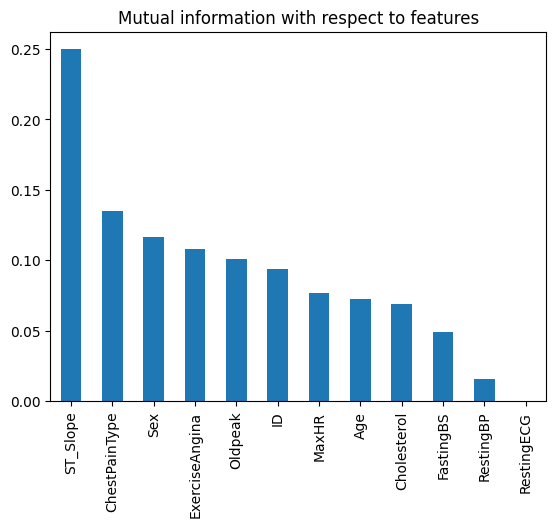

In [ ]:
plt.title('Mutual information with respect to features')
mi.plot.bar()
plt.show()

In [ ]:
sel = SelectKBest(mutual_info_regression, k = 9).fit(X_train, y_train)
X_train.columns[sel.get_support()]

Index(['ID', 'Sex', 'ChestPainType', 'RestingBP', 'FastingBS', 'MaxHR',
       'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')

# ***LINEAR REGRESSION***

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)


In [ ]:
r2_score(y_test, y_predict)

0.4765816676810183

In [ ]:
np.sqrt(mean_squared_error(y_test, y_predict))

0.3568978182800444

In [ ]:
np.std(y)

0.49714274194833685

In [ ]:
X_train_9 = sel.transform(X_train)
X_train_9.shape

(734, 9)

In [ ]:
X_test_9 = sel.transform(X_test)


In [ ]:
model = LinearRegression()
model.fit(X_train_9, y_train)
y_predict = model.predict(X_test_9)
print('r2_score')
r2_score(y_test, y_predict)


r2_score


0.45298452972494885

In [ ]:
r2_score

<function sklearn.metrics._regression.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', force_finite=True)>

In [ ]:
print('rmse')
np.sqrt(mean_squared_error(y_test, y_predict))

rmse


0.3648541016151348

# ***CHI SQUARE TEST***

The chi-square test is a statistical tool used to determine if there is a significant association between categorical variables. It compares observed data with expected data, assuming no relationship between the variables. In essence, it helps us assess whether any observed differences between groups are due to chance or if they are statistically significant. This test is commonly used in fields like biology, social sciences, and market research to analyze survey data, experimental results, and more.

he chi-square test is used for several purposes:

Testing Independence: It is used to determine if there is a significant relationship between two categorical variables. For example, it might be used to test if there is an association between smoking habits and the development of a specific disease.

Goodness of Fit: This test assesses whether the observed categorical data fits a specific distribution or theoretical model. For instance, it could be used to check if observed genetic traits match expected Mendelian ratios.

Homogeneity: It can be employed to test if the distribution of a categorical variable is the same across different groups. For example, it might be used to check if the preference for a particular brand of soda is the same among different age groups.

Hypothesis Testing: It's a tool to conduct hypothesis tests in situations where the data is categorical, rather than continuous.

Quality Control: Industries use chi-square tests to check if the distribution of defective items in a batch is consistent with the expected defect rate.

Survey Analysis: In social sciences, it's used to analyze survey data and assess if responses are independent of demographic variables.

In [ ]:
##titanic = sns.load_dataset('titanic')
titanic = pd.read_csv('/content/drive/MyDrive/AI_Project/titanic_train.csv')

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic = titanic.dropna()

In [ ]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [ ]:
label_encoder = preprocessing.LabelEncoder()
titanic['Sex'] = label_encoder.fit_transform(titanic['Sex'])
titanic['Name'] = label_encoder.fit_transform(titanic['Name'])
titanic['Ticket'] = label_encoder.fit_transform(titanic['Ticket'])
titanic['Embarked'] = label_encoder.fit_transform(titanic['Embarked'])
titanic['Cabin'] = label_encoder.fit_transform(titanic['Cabin'])

In [ ]:
titanic['Age'].fillna(int(titanic['Age'].mean()), inplace=True)
titanic['Cabin'].fillna(int(titanic['Cabin'].mean()), inplace=True)
titanic['Embarked'].fillna(int(titanic['Embarked'].mean()), inplace=True)

In [ ]:
data = titanic[['Pclass', 'Sex', 'Name','Age','SibSp', 'Parch', 'Ticket', 'Fare','Cabin', 'Embarked']].copy()


In [ ]:
data.head()

,Pclass,Sex,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,0,49,38.0,1,0,109,71.2833,72,0
3,1,0,70,35.0,1,0,31,53.1000,48,2
6,1,1,112,54.0,0,0,55,51.8625,117,2
10,3,0,148,4.0,1,1,120,16.7000,131,2
11,1,0,27,58.0,0,0,26,26.5500,43,2


In [ ]:
label_encoder = preprocessing.LabelEncoder()


In [ ]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,49,0,38.0,1,0,109,71.2833,72,0
3,4,1,1,70,0,35.0,1,0,31,53.1000,48,2
6,7,0,1,112,1,54.0,0,0,55,51.8625,117,2
10,11,1,3,148,0,4.0,1,1,120,16.7000,131,2
11,12,1,1,27,0,58.0,0,0,26,26.5500,43,2
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,18,0,47.0,1,1,33,52.5542,91,2
872,873,0,1,35,1,33.0,0,0,89,5.0000,29,2
879,880,1,1,140,0,56.0,0,1,38,83.1583,61,0
887,888,1,1,75,0,19.0,0,0,10,30.0000,25,2


In [ ]:
data.isnull().sum()

Pclass      0
Sex         0
Name        0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [ ]:
##sex = {'male': 0, 'female': 1}
##data['Sex'] = data['Sex'].map(sex)
##data.head()

In [ ]:
##ports = {'S': 0, 'C': 1, 'Q': 2}
##data['Embarked'] = data['Embarked'].map(ports)

In [ ]:
##who = {'man': 0, 'woman': 1, 'child': 2}
##data['who'] = data['who'].map(who)

In [ ]:
##alone = {True: 1, False: 0}
##data['alone'] = data['alone'].map(alone)
##data.head()

***Do F_Score***

In [ ]:
X = data.copy()
y = titanic['Survived']
X.shape, y.shape

((183, 10), (183,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



In [ ]:
X_train

,Pclass,Sex,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
257,1,0,44,30.0,0,0,0,86.5000,35,2
486,1,0,93,35.0,1,0,62,90.0000,78,2
630,1,1,11,80.0,0,0,71,30.0000,3,2
430,1,1,24,28.0,0,0,3,26.5500,62,2
299,1,0,13,50.0,0,1,100,247.5208,31,0
...,...,...,...,...,...,...,...,...,...,...
512,1,1,113,36.0,0,0,93,26.2875,109,2
336,1,1,132,29.0,1,0,24,66.6000,53,2
577,1,0,153,39.0,1,0,48,55.9000,116,2
268,1,0,77,58.0,0,1,103,153.4625,50,2


In [ ]:
y_train

257    1
486    1
630    1
430    1
299    1
      ..
512    1
336    0
577    1
268    1
823    1
Name: Survived, Length: 146, dtype: int64

In [ ]:
f_score = chi2(X_train, y_train)

In [ ]:
f_score

(array([1.51083674e-01, 1.65304384e+01, 1.82498593e+02, 8.31928002e+01,
        2.08339654e+00, 1.16253981e-03, 3.57062827e+00, 2.68965392e+02,
        2.79291768e+00, 3.69183458e-01]),
 array([6.97501904e-01, 4.78753267e-05, 1.38005517e-41, 7.44283047e-20,
        1.48908509e-01, 9.72800568e-01, 5.88100565e-02, 1.90721225e-60,
        9.46816933e-02, 5.43449690e-01]))

In [ ]:
p_values = pd.Series(f_score[1], index = X_train.columns)
p_values.sort_values(ascending = True, inplace = True)
p_values

Fare        1.907212e-60
Name        1.380055e-41
Age         7.442830e-20
Sex         4.787533e-05
Ticket      5.881006e-02
Cabin       9.468169e-02
SibSp       1.489085e-01
Embarked    5.434497e-01
Pclass      6.975019e-01
Parch       9.728006e-01
dtype: float64

Text(0.5, 1.0, 'pvalues with respect to features')

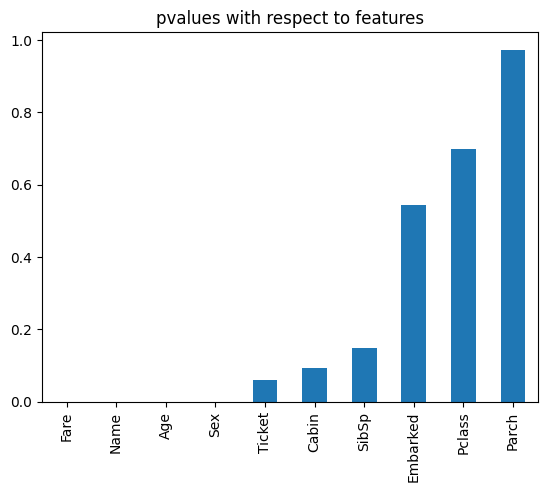

In [ ]:
p_values.plot.bar()
plt.title('pvalues with respect to features')

In [ ]:
X_train_2 = X_train[['Fare', 'Name']]
X_test_2 = X_test[['Fare', 'Name']]

In [ ]:
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy: ', accuracy_score(y_test, y_pred))

In [ ]:
%%time
run_randomForest(X_train_2, X_test_2, y_train, y_test)

Accuracy:  0.6756756756756757
CPU times: user 339 ms, sys: 13.6 ms, total: 353 ms
Wall time: 477 ms


In [ ]:
X_train_3 = X_train[['Fare', 'Name', 'Age']]
X_test_3 = X_test[['Fare', 'Name', 'Age']]

In [ ]:
%%time
run_randomForest(X_train_3, X_test_3, y_train, y_test)

Accuracy:  0.7297297297297297
CPU times: user 309 ms, sys: 7.13 ms, total: 316 ms
Wall time: 484 ms


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    int64  
 4   Sex          183 non-null    int64  
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    int64  
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    int64  
 11  Embarked     183 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 18.6 KB


In [ ]:
X_train_4 = X_train[['Name', 'Sex', 'Pclass', 'Parch']]
X_test_4 = X_test[['Name', 'Sex', 'Pclass', 'Parch']]

In [ ]:
%%time
run_randomForest(X_train_4, X_test_4, y_train, y_test)

Accuracy:  0.7297297297297297
CPU times: user 316 ms, sys: 13.2 ms, total: 329 ms
Wall time: 543 ms


In [ ]:
X_train_5 = X_train[['Fare', 'Name', 'Age', 'Sex', 'Ticket']]
X_test_5 = X_test[['Fare', 'Name', 'Age', 'Sex', 'Ticket']]

In [ ]:
%%time
run_randomForest(X_train_5, X_test_5, y_train, y_test)

Accuracy:  0.8378378378378378
CPU times: user 312 ms, sys: 21.2 ms, total: 333 ms
Wall time: 527 ms


In [ ]:
%%time
run_randomForest(X_train, X_test, y_train, y_test)#original

Accuracy:  0.8108108108108109
CPU times: user 328 ms, sys: 8.75 ms, total: 337 ms
Wall time: 577 ms


What is Regularisation?

Regularization adds a penalty on the different parameters of the model to reduce the freedom of the model. Hence, the model will be less likely to fit the noise of the training data and will improve the generalization abilities of the model.

There are basically 3-types of regularization

1.L1 regularization (also called Lasso) It shrinks the co-efficients which are less important to zero. That means with Lasso regularization we can remove some features.

2.L2 regularization (also called Ridge) It does't reduce the co-efficients to zero`` but it reduces the regression co-efficients with this reduction we can identify which feature has more important.

3.L1/L2 regularization (also called Elastic net)

# ***Ridge Regularisation***

L2 regularization, also known as weight decay, is a technique used in machine learning and specifically in training artificial neural networks to prevent overfitting. Overfitting occurs when a model learns to perform well on the training data but fails to generalize to new, unseen data.

In the context of neural networks, L2 regularization works by adding a penalty term to the loss function during training. This penalty term is proportional to the square of the magnitudes of the weights in the network. The effect of this penalty is to encourage the network to use smaller weights, effectively reducing the complexity of the model.

L2 regularization term=λ∑
i
​
( w
i)^
2
​

wi
​

 represents a weight in the neural network.

λ is the regularization parameter, which controls the strength of the regularization. A larger

λ will result in a stronger penalty on large weights.

In [ ]:
sel = SelectFromModel(LogisticRegression(C = 0.05, penalty = 'l1', solver = 'liblinear'))
sel.fit(X_train, y_train) #for finding higher co efficient

SelectFromModel(estimator=LogisticRegression(C=0.05, penalty='l1',
                                             solver='liblinear'))

In [ ]:
SelectFromModel(estimator=LogisticRegression(C=0.05, penalty='l1', solver='liblinear'))

SelectFromModel(estimator=LogisticRegression(C=0.05, penalty='l1',
                                             solver='liblinear'))

In [ ]:
sel.get_support()

array([False, False,  True,  True, False, False,  True,  True,  True,
       False])

In [ ]:
features = X_train.columns[sel.get_support()]
features

Index(['Name', 'Age', 'Ticket', 'Fare', 'Cabin'], dtype='object')

In [ ]:
X_train_l1 = sel.transform(X_train)
X_test_l1 = sel.transform(X_test)
X_train_l1.shape, X_test_l1.shape

((146, 5), (37, 5))

In [ ]:
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs = -1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy: ', accuracy_score(y_test, y_pred))

In [ ]:
%%time
run_randomForest(X_train_l1, X_test_l1, y_train, y_test)

Accuracy:  0.6756756756756757
CPU times: user 311 ms, sys: 5.33 ms, total: 317 ms
Wall time: 426 ms


In [ ]:
%%time
run_randomForest(X_train, X_test, y_train, y_test)

Accuracy:  0.8108108108108109
CPU times: user 332 ms, sys: 8.65 ms, total: 341 ms
Wall time: 636 ms


***Ridge Regression***

In [ ]:
rr = RidgeClassifier(alpha=300)
rr.fit(X_train, y_train)
RidgeClassifier(alpha=300)

RidgeClassifier(alpha=300)

In [ ]:
rr.score(X_test, y_test)

0.8378378378378378

Let's get the co-efficients of the regression

In [ ]:
rr.coef_

array([[-1.41931453e-02, -8.64831552e-02, -3.08441116e-03,
        -1.56240659e-02,  1.07695948e-02, -3.16036719e-02,
        -1.19323849e-03,  1.36837093e-03, -6.16958679e-05,
        -1.52564535e-02]])

Wrapping method

Uses of Wrapping method

1.Use combinations of variables to determine predictive power.

2.To find the best combination of variables.

3.Computationally expensive than filter method.

4.To perform better than filter method.

5.Not recommended on high number of features.

Types of wrapper method:

   1.Forward

   2.Backward

   3.Exhaust

# ***STEP FORWARD SELECTION***

n this wrapping method, it selects one best feature every time and finally it combines all the best features for the best accuracy.

In [ ]:
data = load_wine()

In [ ]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [ ]:
my_dict = {
    'data': None,
    'target': None,
    'frame': None,
    'target_names': None,
    'DESCR': None,
    'feature_names': None
}


In [ ]:
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [ ]:
X = pd.DataFrame(data.data)
y = data.target

In [ ]:
X.columns = data.feature_names
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
X.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape

((142, 13), (36, 13))

# ***STEP FORWARD FEATURE SELECTION***

In [ ]:
sfs = SFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs = -1),
         k_features = 7, #desired num of feature
          forward= True,
          floating = False,
          verbose= 2,#form of log
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1
         ).fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:   20.4s finished

[2023-10-11 14:37:38] Features: 1/7 -- score: 0.7674603174603174[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   16.8s finished

[2023-10-11 14:37:55] Features: 2/7 -- score: 0.9577380952380952[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   15.0s finished

[2023-10-11 14:38:10] Features: 3/7 -- score: 0.9859126984126985[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.0s finished

[2023-10-11 14:38:17] Features: 4/7 -- score: 0.9787698412698413[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    6.4s finished

[202

In [ ]:
sfs.k_feature_names_

('alcohol',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'proanthocyanins',
 'color_intensity',
 'hue')

In [ ]:
sfs.k_feature_idx_

(0, 4, 5, 6, 8, 9, 10)

In [ ]:
sfs.k_score_

0.9861111111111112

In [ ]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(6,)","[0.7222222222222222, 0.8333333333333334, 0.742...",0.76746,"(flavanoids,)",0.06709,0.041853,0.024164
2,"(6, 9)","[0.9166666666666666, 1.0, 0.9714285714285714, ...",0.957738,"(flavanoids, color_intensity)",0.049936,0.031152,0.017986
3,"(4, 6, 9)","[0.9722222222222222, 1.0, 0.9714285714285714, ...",0.985913,"(magnesium, flavanoids, color_intensity)",0.022586,0.01409,0.008135
4,"(4, 5, 6, 9)","[0.9722222222222222, 1.0, 0.9714285714285714, ...",0.97877,"(magnesium, total_phenols, flavanoids, color_i...",0.019655,0.012262,0.007079
5,"(4, 5, 6, 8, 9)","[1.0, 1.0, 0.9714285714285714, 0.9714285714285...",0.985714,"(magnesium, total_phenols, flavanoids, proanth...",0.0229,0.014286,0.008248
6,"(0, 4, 5, 6, 8, 9)","[1.0, 1.0, 0.9714285714285714, 1.0]",0.992857,"(alcohol, magnesium, total_phenols, flavanoids...",0.019832,0.012372,0.007143
7,"(0, 4, 5, 6, 8, 9, 10)","[0.9444444444444444, 1.0, 1.0, 1.0]",0.986111,"(alcohol, magnesium, total_phenols, flavanoids...",0.038562,0.024056,0.013889


In [ ]:
sfs = SFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs = -1),
         k_features = (1, 8),
          forward= True,
          floating = False,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1
         ).fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:   10.6s finished

[2023-10-11 14:38:45] Features: 1/8 -- score: 0.7674603174603174[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   10.1s finished

[2023-10-11 14:38:55] Features: 2/8 -- score: 0.9577380952380952[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    7.2s finished

[2023-10-11 14:39:02] Features: 3/8 -- score: 0.9859126984126985[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.3s finished

[2023-10-11 14:39:11] Features: 4/8 -- score: 0.9787698412698413[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    5.7s finished

[202

In [ ]:
sfs.k_score_

0.9928571428571429

In [ ]:
sfs.k_feature_names_

('alcohol',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'proanthocyanins',
 'color_intensity')

# *STEP BACKWARD SELECTION*

It is reverse process of Forward Step Selection method, intially it takes all the features and remove one by one every time. Finally it left with required number of features for the best accuracy.

In [ ]:
sfs = SFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs = -1),
         k_features = (1, 8),
          forward= False,
          floating = False,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1
         ).fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:   10.7s finished

[2023-10-11 14:39:44] Features: 12/1 -- score: 0.9861111111111112[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    8.1s finished

[2023-10-11 14:39:52] Features: 11/1 -- score: 0.9861111111111112[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    8.9s finished

[2023-10-11 14:40:01] Features: 10/1 -- score: 0.9791666666666666[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.8s finished

[2023-10-11 14:40:09] Features: 9/1 -- score: 0.9861111111111112[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    6.5s finished

[

In [ ]:
sbs = sfs
sbs.k_score_

0.9859126984126985

In [ ]:
sbs.k_feature_names_

('alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'flavanoids',
 'nonflavanoid_phenols',
 'color_intensity')

# ***EXHAUST FEATURE SELECTION***

It is also called as subset selection method.
It fits the model with each possible combinations of N features.
( y = B0, y = B0 + B1.X1, y = C0 + C1.X2 )
It requires massive computational power.
It uses test error to evaluate model performance.

In [ ]:
efs = EFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1),
         min_features= 4,
          max_features= 5,
          scoring='accuracy',
          cv = None,
          n_jobs=-1
         ).fit(X_train, y_train)

Features: 2002/2002

In [ ]:
715 + 1287

2002

In [ ]:
efs.best_score_

1.0

In [ ]:
efs.best_feature_names_

('alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash')

In [ ]:
efs.best_idx_

(0, 1, 2, 3)

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


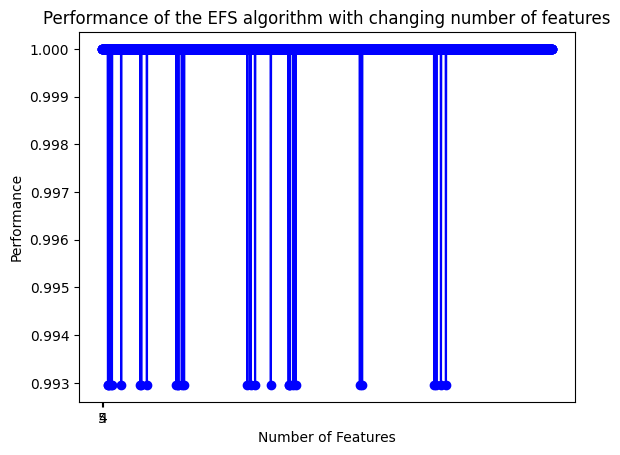

In [ ]:
plot_sfs(efs.get_metric_dict(), kind='std_dev')
plt.title('Performance of the EFS algorithm with changing number of features')
plt.show()